In [1]:
# In this notebook, we explore the basic properties of the InstaCart datasets. Our
# mission here is to:
#   1. Familiarize ourselves with the structure of the data sets,
#   2. Understand basic statistics about the data, to get a feel for
#      what we might be able to do with the data
#   3. Assess data quality and perform basic sanity checks. Do the data
#      agree with the claimed specs? Are values missing? Are some values
#      clearly insane and need to be removed?
#   4. Develop a baseline strategy for answering the data challenge.
#

#
# This script continues from basket_sizes.ipynb. We give broad overview statistics
# of how much information we have about the products in the InstaCart catalog.
#

In [2]:
import pandas as pd
import numpy as np
from math import factorial

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (10, 6)

In [3]:
print "Reading orders data ... ",

# The raw data take about 750Mb total on disk.
prior = pd.read_csv('order_products__prior.csv')
train = pd.read_csv('order_products__train.csv')
orders = pd.read_csv('orders.csv')
departments = pd.read_csv('departments.csv')
products = pd.read_csv('products.csv')
prior = prior.merge(orders, on='order_id', how='left')

print "done."

Reading orders data ...  done.


In [6]:
#
# Let's get crazy. Let our hair down a bit ...
#
x = products.groupby('department').apply(lambda x: sum(x['reordered']) / len(x))
print x.sort_values()

department
personal care      0.315587
pantry             0.348234
international      0.366351
other              0.389417
household          0.402363
missing            0.408463
canned goods       0.462662
dry goods pasta    0.465326
frozen             0.544682
breakfast          0.552753
babies             0.572886
snacks             0.572935
meat seafood       0.574865
alcohol            0.586011
bulk               0.610356
deli               0.614684
bakery             0.625252
pets               0.628368
beverages          0.652905
produce            0.653538
dairy eggs         0.672758
dtype: float64


In [ ]:
#
# Not surprising. The kind of product it is correlates to its "repurchasedness".
# We should include department_id as a feature in the next step. It's maybe not clear
# whether this contains *new* information. 
#

In [12]:
# Correlation between product category and day of week?

#d = prior.merge(products, on='product_id', how='left').groupby(
#    'department_id').apply(lambda x: x['order_dow'].mean()).reset_index(
#    name='mean_dow')

t = prior.merge(products, on='product_id', how='left').groupby(
    ['department_id','order_hour_of_day']).apply(len).reset_index(
    name='hod')

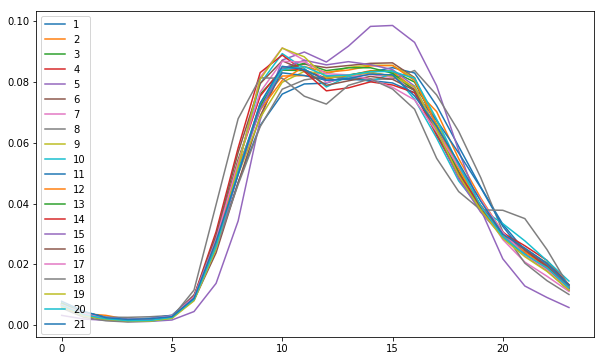

In [18]:
t.head()
for did in t['department_id'].unique():
    data = t[t['department_id'] == did]['hod']
    data /= data.sum()
    plt.plot(range(24), data, label=did)
plt.legend(loc='upper left')
plt.show()